The first dataset is from a Kaggle competition (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview), where the task is to predict a house sale price given house features.

### Data cleaning and Exploratory Data Analysis (EDA)

In [19]:
import pandas as pd
import numpy as np 

In [20]:
df = pd.read_csv('train.csv') #it is the same data as the kaggle competition's train.csv.

In [21]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Inspect Null values

In [24]:
#  np.nan and None are native null values in python
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
nulldemo = pd.DataFrame(a)
nulldemo

,0
0,NaN
1,None
2,[]
3,{}
4,NaN
5,Null
6,NULL
7,None
8,NA
9,?


.isnull() method applied to pandas dataframe or series can detect null values. .dropna() method in pandas will detect null values and can be specified to drop either rows or columns that contain null values. Below shows that .isnull() only detects the python-native null values and cannot detect other forms (string value) of variables that meant null.

In [25]:
nulldemo.isnull()

,0
0,True
1,True
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


 # Inspect observations (rows) with null values. How many observations have at least one missing value

In [26]:
# count the number of rows with at least one missing value
rows_with_nulls = df.isna().any(axis=1).sum()
rows_with_nulls

1460

In [27]:
# calculate null counts for each feature and filter out features with zero null count
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts >= 1]
null_counts

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

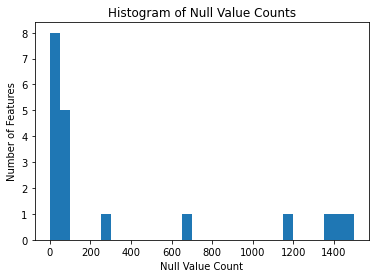

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate null counts for each feature and filter out features with zero null count
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts >= 1]

# create list of feature names with at least one null value
null_features = null_counts.index.tolist()

# create histogram with bins of width 50
bins = range(0, 1550, 50)  # modified range to exclude upper bound of last bin
histogram = plt.hist(null_counts, bins=bins)

# set x-axis ticks to 0, 50, 100, 150, etc.
plt.xticks(range(0, 1600, 200))

# add labels and title
plt.xlabel('Null Value Count')
plt.ylabel('Number of Features')
plt.title('Histogram of Null Value Counts')

# show the plot
plt.show()

# Imputing missing values

Complete case analysis (CCA) is to drop any observations (rows) that have null values. It is suitable if the number of observations with null values are very small (say, less than 5%) compared to the total number of observations.

If the data has a large number of features (columns) and the model(s) does not need that many features (some models work better with less number of features), we can consider dropping features that have many missing values. Before dropping features, it is generally a good idea checking whether the feature with missing values is important feature or not (which may need the analyst's judgement). If the feature is very important for the prediction task (for example, a house size when predicting house price) but has a large amount of missing values, we cannot simply drop the feature, or in a rare case, it could mean that the data is not suitable for the analysis. One will have to work with only the observations that has values on that feature given the number of observations is sufficient, or collect more data. If we know that those features are not very important and have a large number of missing values, we can drop the features. 

In [11]:
# count the number of rows with at least one missing value
rows_with_nulls = df.isna().any(axis=1).sum()
rows_with_nulls

1460

Dropping feature columns

Imputation is the process of replacing missing data with substituted values. Let's assume we want to keep columns where 5% or less of the values are null (keep and impute) and discard any column where more than 5% of the values are null (throw). Treat the string type "None" as a category and not a null value.

In [12]:
# calculate percentage of null values for columns with null values
null_cols = df.columns[df.isnull().any()]
null_perc = df[null_cols].isnull().mean() * 100

# create list of columns to keep (5% or less null values)
keep_cols = null_perc[null_perc <= 5].index.tolist()

# create list of columns to throw (more than 5% null values)
throw_cols = null_perc[null_perc > 5].index.tolist()

features_to_impute = keep_cols
features_to_throw = throw_cols

print(len(features_to_impute), features_to_impute)
print(len(features_to_throw), features_to_throw)

8 ['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']
11 ['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [13]:
df.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature','Id'], axis=1, inplace=True)
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


Impute missing data

Before imputing columns, we need to think about what methods to use to impute columns. The imputation strategy can be different depending on the variable types and variable value distribution. There are many imputation techniques, but let's use a few simple ones.

For a numerical variable imputation, we impute mean value if the distribution is symmetric while we use median value to impute when the distribution is skewed. 

For a categorical variable imputation, we can impute with the most frequent categorical value. It is a simple method but it can distort the original distribution. It is also possible to create a "missing" category to capture missingness. The advantage of using missing category is that it captures missingness but its disadvantage is that it creates another rare category.

Below code shows histograms of feature columns that we can impute.

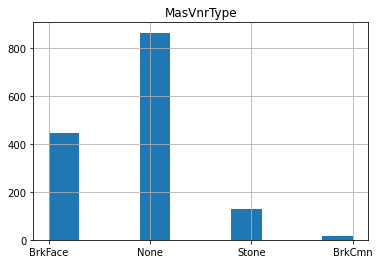

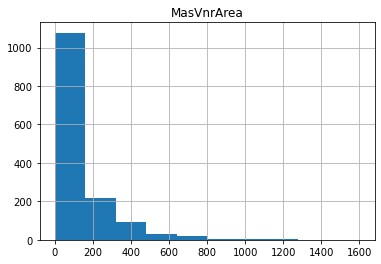

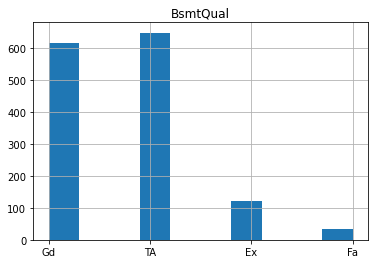

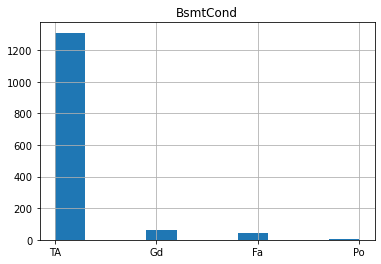

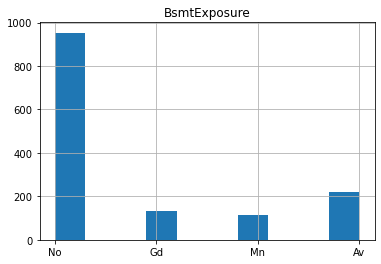

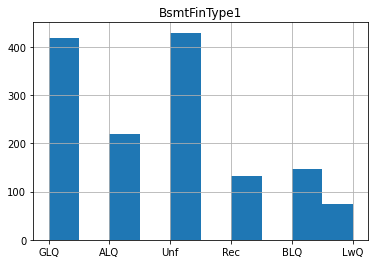

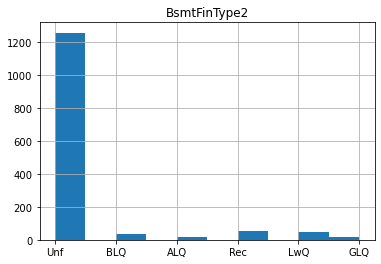

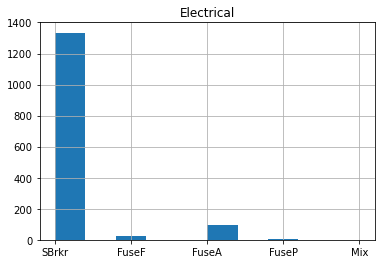

In [14]:
for c in features_to_impute:
    df[c].hist()
    plt.title(c)
    plt.show()

In [15]:
# identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:

categorical_features = df.select_dtypes(include=['object']).columns
# loop over categorical columns with missing values
for col in categorical_features[df[categorical_features].isnull().any()]:
    # find the mode of the feature
    mode = df[col].mode()[0]
    # fill missing values with the mode
    df[col].fillna(mode, inplace=True)

# identify numerical features
numerical_features = df.select_dtypes(include=['int', 'float']).columns

# loop over numerical columns with missing values
for col in numerical_features[df[numerical_features].isnull().any()]:
    # calculate the mean of the feature
    mean = df[col].mean()
    # fill missing values with the mean
    df[col].fillna(mean, inplace=True)

In [17]:
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [18]:
# Sample Tests features_to_impute
for c in features_to_impute:
    assert df[c].isnull().sum()==0, f"Feature: '{c}' still has null values"